In [1]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# Plot $g(u)$

In [2]:
def rho(x, name="probit"):
    if name == "probit":
        return st.norm.pdf(x) / st.norm.cdf(x)
    if name == "logistic":
        return np.exp(-x) / (1 + np.exp(-x))

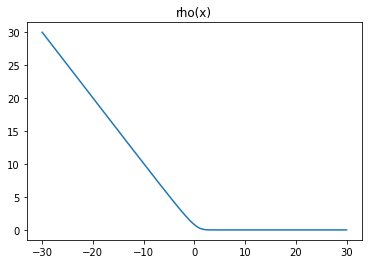

In [3]:
ticks = np.linspace(-30, 30, 1000)
plt.plot(ticks, rho(ticks))
plt.title("rho(x)")
plt.show()

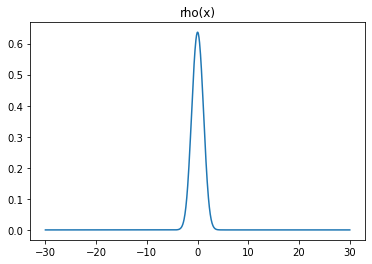

In [4]:
ticks = np.linspace(-30, 30, 1000)
plt.plot(ticks, rho(ticks) * rho(-ticks))
plt.title("rho(x)")
plt.show()

In [16]:
p = 10
M = 2
n = 1000
sigma_01 = 1
sigma_list = np.linspace(start=0.1, stop=10.1, num=100)

In [47]:
np.random.seed(0)
beta_0 = np.ones((p, 1)) * 0.2
X = np.random.uniform(size=(n, p))

- $\rho(x) = \frac{\phi(x)}{\Phi(x)}$

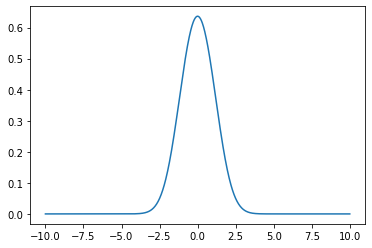

In [48]:
ticks = np.linspace(-10, 10, 1000)
plt.plot(ticks, rho(ticks) * rho(-ticks))

- $A_1$ 随 $\sigma_1$ 变大的变化

In [49]:
## for 循环版本
# AAA = 0
# tmp = np.dot(X, beta_0) / sigma_01
# tmp = tmp.reshape(-1)


# for i in range(n):
#     Xi = X[i].reshape((-1, 1))
#     rho1 = rho(tmp[i]) # rho(np.dot(Xi.transpose(), beta_0) / sigma_01)
#     rho2 = rho(-tmp[i])
#     AAA += rho1 * rho2 * Xi * Xi.transpose() / n

In [50]:
# tmp = np.dot(X, beta_0) / sigma_01
# tmp = tmp.reshape(-1)
# rhos1 = np.diag(rho(tmp))
# rhos2 = np.diag(rho(-tmp))
# Z1 = np.dot(rhos1, X)
# Z2 = np.dot(rhos2, X)
# A = np.dot(Z1.transpose(), Z2) / n
# A.shape

In [51]:
def compute_A(sigma, X, beta):
    tmp = np.dot(X, beta) / sigma
    tmp = tmp.reshape(-1)
    rhos1 = np.diag(rho(tmp))
    rhos2 = np.diag(rho(-tmp))
    Z1 = np.dot(rhos1, X)
    Z2 = np.dot(rhos2, X)
    A = np.dot(Z1.transpose(), Z2) / n
    return A

In [52]:
Avar_list = []
A_01 = compute_A(sigma_01, X, beta_0)
A_01.shape

(10, 10)

In [53]:
for sigma in sigma_list:
    A_02 = compute_A(sigma, X, beta_0)
    tmp = np.dot(A_02, beta_0)
    A = A_01 + (A_02 - np.dot(tmp, tmp.transpose()) / np.dot(beta_0.transpose(), tmp)) / sigma**2
    Avar = np.linalg.inv(A) * M
    Avar_list.append(Avar)

Text(0.5, 1.0, 'sigma1 = 1')

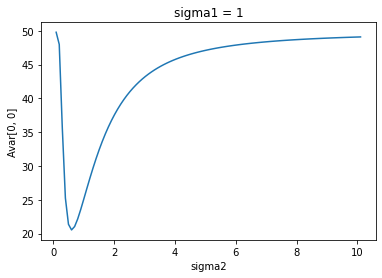

In [54]:
k = 0
plt.plot(sigma_list, [matrix[k, k] for matrix in Avar_list])
plt.xlabel("sigma2")
plt.ylabel(f"Avar[{k}, {k}]")
plt.title(f"sigma1 = {sigma_01}")

Text(0, 0.5, 'trace($\\Sigma_\\beta^{-1}$)')

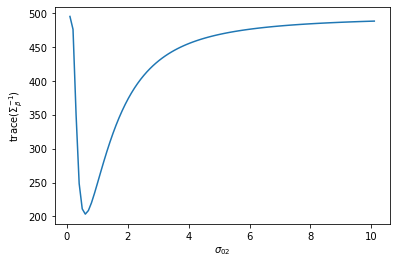

In [55]:
plt.plot(sigma_list, [np.trace(matrix) for matrix in Avar_list])
plt.xlabel(r"$\sigma_{02}$")
plt.ylabel(r"trace($\Sigma_\beta^{-1}$)")
# plt.title(r"$\sigma_1$ = 4")

In [56]:
Avar_df = pd.DataFrame({"sigma": sigma_list, 
                        "trace": [np.trace(matrix) for matrix in Avar_list]})
Avar_df.head()

,sigma,trace
0,0.10000,495.006461
1,0.20101,475.977262
2,0.30202,349.755327
3,0.40303,248.574974
4,0.50404,211.217525


In [57]:
Avar_df.to_csv("/Users/helenology/Desktop/光华/ 论文/4-Crowdsourcing/codes/simulation/trace.csv")

In [147]:
np.trace(np.linalg.inv(A_01)) * M

2272.489886315778